# YouTube Data API v3 - Mapping Corridor Digital's Network

### Python Libraries

In [1]:
import requests
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import networkx as nx

import collections
import importlib
#importlib.reload(network_graphs)

## Custom modules

In [2]:
import config # api_key is stored in config.py
import youtube_requests # Functions for making youtube_requests
import data_processing # Functions for data processing    
import network_graphs # Functions for creating a network graph

## Run autoloader to automatically reimport our modules

In [3]:
%load_ext autoreload

%autoreload 1

%aimport network_graphs
%aimport youtube_requests

## Create a list of channels to graph network

Here we are graphing Corridor, Corridor Crew, Corridor Cast, Node, Guilletine Channel, 

In [4]:
CORRIDOR_FIVE = ['UCNSeDrWRGxx5p2l3tj7RWQw',
                'UCsn6cjffsvyOZCZxvGoJxGg',
                'UCSpFnDQr88xCZ80N',
                'UCI4Wh0EQPjGx2jJLjmTsFBQ',
                'UCb8ewylk7d2M_1dLGEiFmuQ']

# Youtube Channel Details by Network

Havent seen this list, request and cache
20 total neighbors; 0 out of 4 channels do not feature channels
78 total neighbors; 1 out of 16 channels do not feature channels
217 total neighbors; 9 out of 67 channels do not feature channels
808 total neighbors; 23 out of 168 channels do not feature channels


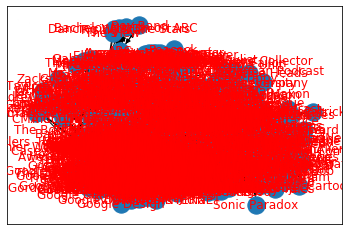

In [5]:
# Get a list of dictionaries, where each dictionary represents details for a specific channel
CHANNELS_DETAILS_ITEMS_LIST = youtube_requests.youtube_channel_details_by_network(CORRIDOR_FIVE, 4)

# Graph the network of channels
G = network_graphs.create_nx_graph(CHANNELS_DETAILS_ITEMS_LIST, True)

# Extract a columnar list of channel details
CHANNELS_DETAILS_LIST = data_processing.extract_channel_details(CHANNELS_DETAILS_ITEMS_LIST)

# Create a dataframe
DF = data_processing.create_df_from_details_list(CHANNELS_DETAILS_LIST)

# Graph G
network_graphs.graph_nx_graph(G)

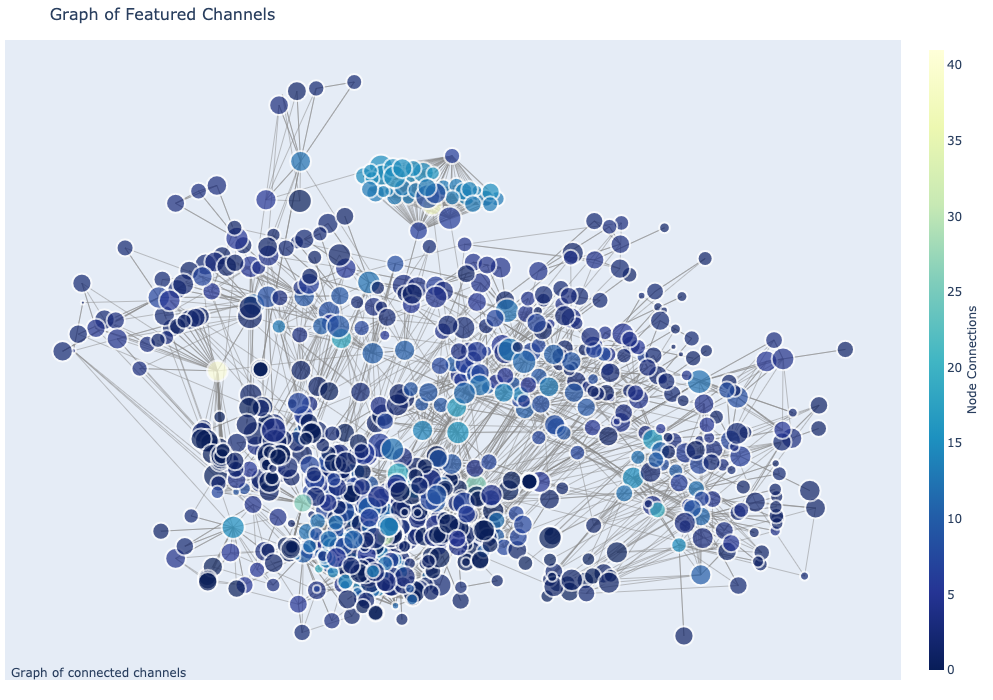

In [6]:
fig = network_graphs.plotly_network_graph(G)
fig

## Page Rank, In-Degree centrality, Betweeness Centrality, and In-Degree value

In [14]:
page_rank_series = pd.Series(data = network_graphs.simple_page_rank(G), index = list(G.nodes().keys()))
DF['page_rank'] = DF['id'].map(lambda x:page_rank_series[x])

betweenness_dict = nx.betweenness_centrality(G)
DF['betweenness_centrality'] = DF['id'].map(lambda x:betweenness_dict[x])

in_degree_centrality_dict = nx.in_degree_centrality(G)
DF['in_degree_centrality'] = DF['id'].map(lambda x:in_degree_centrality_dict[x])

in_degree_dict = {node:G.in_degree()[node] for node in G.nodes()}
DF['in_degree'] = DF['id'].map(lambda x:in_degree_dict[x])

degree_dict = {node:G.degree()[node] for node in G.nodes()}
DF['degree'] = DF['id'].map(lambda x:degree_dict[x])

FEATURES = ['title','subscriberCount','viewCount','page_rank','featuredChannelsCount','degree','in_degree','betweenness_centrality','in_degree_centrality']

### Sort channels by page rank

In [15]:
DF[FEATURES].sort_values(
    'page_rank', ascending=False).head(8)

title  subscriberCount  viewCount  \
91                                       NBC           725000   57449540   
527                             Music of FOX          1390000  235630568   
613              Animation Domination on FOX           702000  397387087   
471                              Beat Shazam            26500    3353473   
577                           Hell's Kitchen            67400   13514575   
771  Gordon Ramsay's 24 Hours To Hell & Back            61500    5869651   
450                               Family Guy             5170   28605713   
516                             Taste of FOX            31300   17825322   

     page_rank  featuredChannelsCount  degree  in_degree  \
91    0.029854                     39      78         39   
527   0.027456                     14      28         14   
613   0.027456                     14      28         14   
471   0.027456                     14      28         14   
577   0.027456                     14      28         14   
771   0.027456                     14      28         14   
450   0.027456                     14      28         14   
516   0.027456                     14      28         14   

     betweenness_centrality  in_degree_centrality  
91                 0.015583              0.041667  
527                0.000000              0.014957  
613                0.000000              0.014957  
471                0.000000              0.014957  
577                0.000000              0.014957  
771                0.000000              0.014957  
450                0.000000              0.014957  
516                0.000000              0.014957

### Sort channels by betweenness centrality.

In [16]:
DF[FEATURES].sort_values(
    'betweenness_centrality', ascending=False).head(8)

title  subscriberCount   viewCount     page_rank  \
1           Corridor          8080000  1468708878  3.291089e-05   
7    devinsupertramp          5920000  1438449424  2.885126e-06   
16        RocketJump          9000000  1904315930  3.783931e-04   
21              Hulu          1770000   391638699  5.052265e-03   
17         Nukazooka          2260000   670407939  8.162243e-06   
36  Lindsey Stirling         12500000  2969625643  4.433032e-07   
85            TomSka          6440000  1656428627  8.815454e-07   
18         Mike Diva           650000   142872831  2.978470e-06   

    featuredChannelsCount  degree  in_degree  betweenness_centrality  \
1                      11      34         23                0.179629   
7                      10      25         15                0.138354   
16                      3      18         15                0.086476   
21                     17      18          1                0.086403   
17                      8      19         11                0.077023   
36                      9      19         10                0.072640   
85                     15      37         22                0.067300   
18                      7      17         10                0.061550   

    in_degree_centrality  
1               0.024573  
7               0.016026  
16              0.016026  
21              0.001068  
17              0.011752  
36              0.010684  
85              0.023504  
18              0.010684

### Sort channels by in_degree centrality.

In [17]:
DF[FEATURES].sort_values(
    'in_degree_centrality', ascending=False).head(8)

title  subscriberCount    viewCount  \
888             Late Night with Seth Meyers          3830000   1946474852   
712          A Little Late With Lilly Singh           470000     56064177   
920                                 Peacock            75000     13640188   
641  The Tonight Show Starring Jimmy Fallon         25400000  12793492262   
91                                      NBC           725000     57449540   
144                             FX Networks           184000     88066035   
856                     Saturday Night Live         10300000   9414791290   
440                   American Horror Story            47000            0   

     page_rank  featuredChannelsCount  degree  in_degree  \
888   0.006416                      9      47         39   
712   0.003769                      8      45         39   
920   0.003629                     22      45         39   
641   0.006428                      8      47         39   
91    0.029854                     39      78         39   
144   0.010891                     31      58         27   
856   0.003750                      6      33         27   
440   0.005147                     15      38         26   

     betweenness_centrality  in_degree_centrality  
888                0.000614              0.041667  
712                0.048338              0.041667  
920                0.000497              0.041667  
641                0.000632              0.041667  
91                 0.015583              0.041667  
144                0.013432              0.028846  
856                0.004361              0.028846  
440                0.000010              0.027778

## Strongly Connected Components

In [12]:
# Create a list of strongly connected components
scc_list = [scc for scc in nx.strongly_connected_components(G)]

# Grab the largest strongly connected component
largest_scc_index = [i for i,cn in enumerate(scc_list) if len(cn) == max([len(cnn) for cnn in scc_list])][0]

# Graph out the subgraph for the largest subset of strongly connected components
H = G.subgraph(list(scc_list[largest_scc_index]))

Plot of our subgraph of strongly connected components

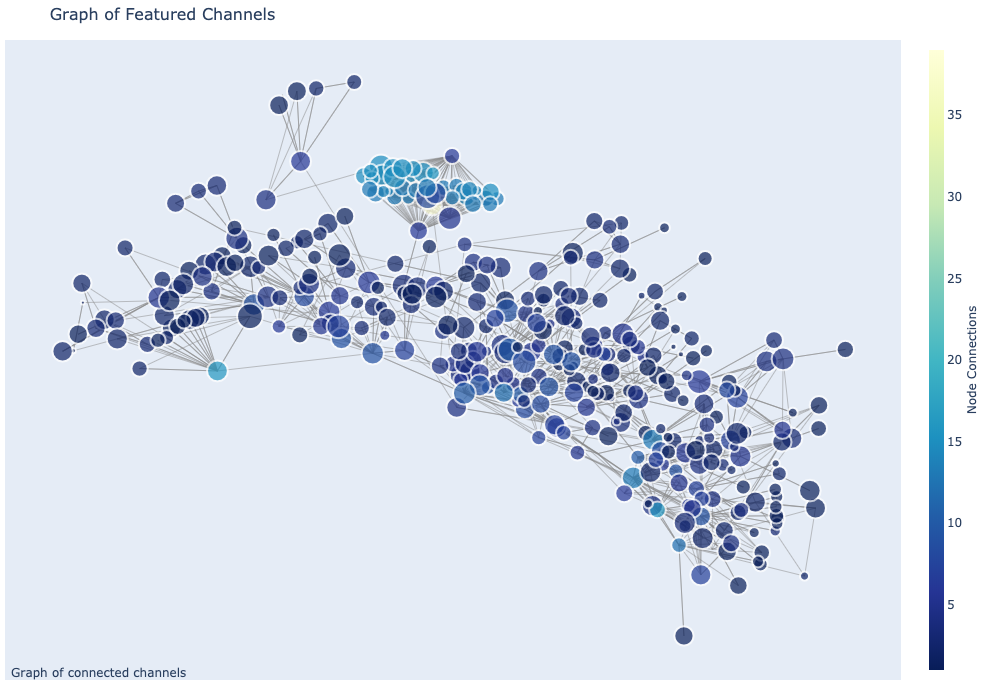

In [13]:
network_graphs.graph_nx_graph(H)
network_graphs.plotly_network_graph(H)